In [4]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [5]:
A_imgs = []
path = ('C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/A/')
#print(os.listdir(path))

for image in os.listdir(path):
    img = cv2.imread(f'C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/A/{image}')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100, 100))
    A_imgs.append(img)
                     

In [6]:
B_imgs = []
path = ('C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/B/')
#print(os.listdir(path))

for image in os.listdir(path):
    img = cv2.imread(f'C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/B/{image}')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100, 100))
    B_imgs.append(img)

In [7]:
C_imgs = []
path = ('C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/C/')
#print(os.listdir(path))

for image in os.listdir(path):
    img = cv2.imread(f'C:/Users/Kumbhkaran/Technocolabs/Final Project/datasets/C/{image}')
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100, 100))
    C_imgs.append(img)
    

In [8]:
A_imgs = np.asarray(A_imgs)
B_imgs = np.asarray(B_imgs)
C_imgs = np.asarray(C_imgs)

In [9]:
A_imgs.shape, B_imgs.shape, C_imgs.shape

((1000, 100, 100), (1000, 100, 100), (1000, 100, 100))

In [10]:
A_imgs = A_imgs.reshape((1000, 100, 100, 1))
B_imgs = B_imgs.reshape((1000, 100, 100, 1))
C_imgs = C_imgs.reshape((1000, 100, 100, 1))

In [11]:
A_imgs.shape, B_imgs.shape, C_imgs.shape

((1000, 100, 100, 1), (1000, 100, 100, 1), (1000, 100, 100, 1))

In [12]:
a_label = np.asarray([0] * len(A_imgs))
b_label = np.asarray([0] * len(B_imgs))
c_label = np.asarray([0] * len(C_imgs))

In [13]:
a_label.shape, b_label.shape, c_label.shape

((1000,), (1000,), (1000,))

In [14]:
labels = np.hstack((a_label, b_label, c_label))
imgs = np.vstack((A_imgs, B_imgs, C_imgs))

In [15]:
labels.shape

(3000,)

In [16]:
imgs.shape

(3000, 100, 100, 1)

In [17]:
from sklearn.utils import shuffle

In [18]:
imgs, labels = shuffle(imgs, labels)

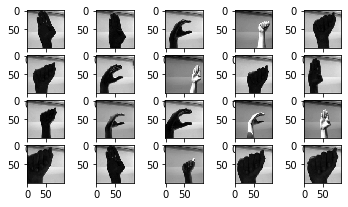

In [19]:
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(imgs[i].reshape((100, 100)),cmap = 'gray')

plt.show()

In [20]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [21]:
labels = to_categorical(labels, 3)

In [22]:
labels.shape

(3000, 3)

In [23]:
imgs = imgs/255

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(imgs, labels, test_size = 0.2, random_state = 42)

In [26]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2400, 100, 100, 1), (600, 100, 100, 1), (2400, 3), (600, 3))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [28]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape = x_train.shape[1:]))
model.add(MaxPool2D())
model.add(Conv2D(256, (3, 3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Conv2D(512, (3, 3), activation = 'relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [29]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [30]:
history = model.fit(x_train, y_train, batch_size = 64, validation_data = (x_test, y_test), epochs = 5)

Train on 2400 samples, validate on 600 samples
Epoch 1/5
2400/2400 [==============================] - 425s 177ms/sample - loss: 0.0289 - accuracy: 0.9967 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
2400/2400 [==============================] - 347s 145ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
2400/2400 [==============================] - 447s 186ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
2400/2400 [==============================] - 374s 156ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
2400/2400 [==============================] - 330s 137ms/sample - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [31]:
score = model.evaluate(x= imgs, y= labels, verbose = 0)
print('Accuracy', score[1])

Accuracy 1.0


In [32]:
print(np.argmax(y_test[100]))
print(np.argmax(model.predict(x_test[100].reshape((1, 100, 100, 1)))))

0
0


In [33]:
model.save('ASL.h5')